In [1]:
%matplotlib inline
import numpy as np
import src.io as io
import src.components as cmpnt
import src.rigidbodies as rb

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
pdb_filename = 'toto.pdb'
ids_filename = ''
jobname  = 'test' 

In [ ]:
traj, ids = io.load_dataset(pdb_filename,ids_filename=ids_filename,superpose=True)
traj_new,ids_new = cmpnt.filter(traj,ids,title=jobname)

In [ ]:
rbclust = rb.cluster(traj_new)

In [ ]:
rbclust.shape

In [ ]:
cmpnt.plot_cluster(rbclust,np.arange(rbclust.shape[0]+1))

In [ ]:
n_clusters = 5
method='ward'
assignment = rb.get_assignment(rbclust,n_clusters,method=method)
rb.save_cluster_in_bfac(traj_new,'test2_rb.pdb',assignment)

In [ ]:
assignment_new = assignment
for wsize in [6,10,14,18,22]:
    assignment_new = rb.filter_assignment(traj_new,assignment,wsize=wsize)
    rb.save_cluster_in_bfac(traj_new,'test2_rb2.pdb',assignment_new)

In [2]:
itemlist=('item1.pdb','item2.pdb')
io.merge_pdb_list(filelist=itemlist,output='merged.pdb',superpose=True)

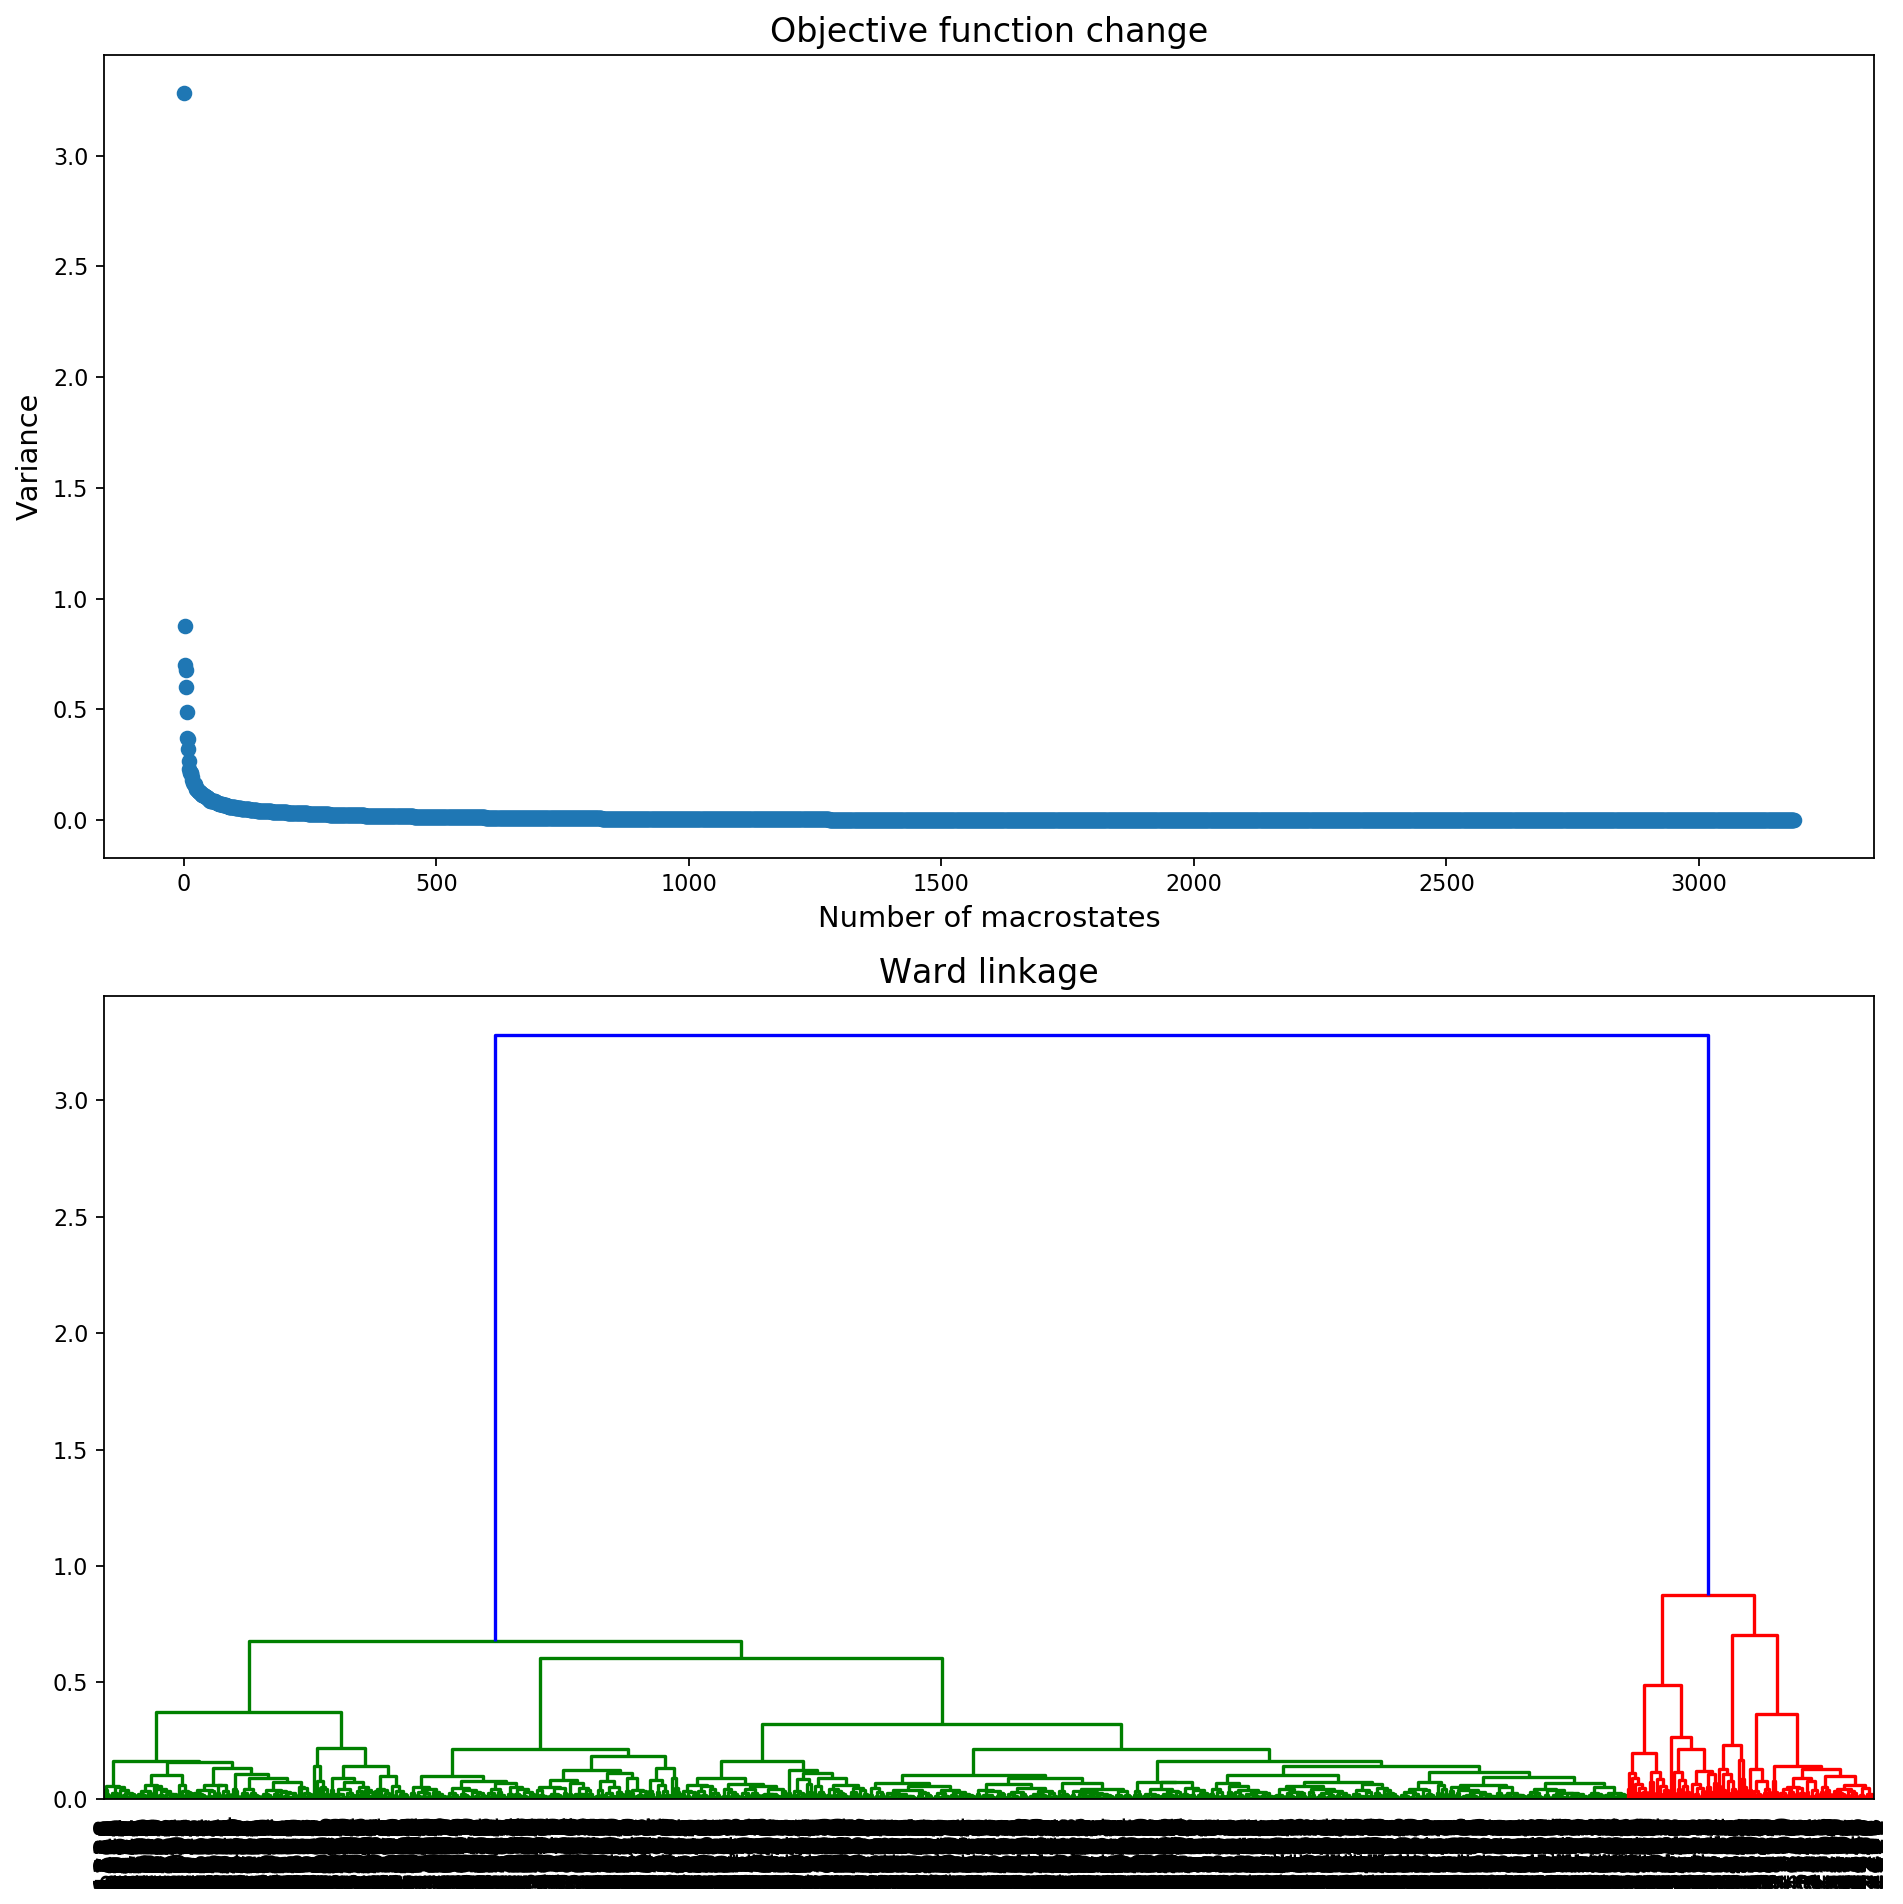

In [3]:
traj_joined = io.load_traj('merged.pdb',superpose=True)
rbclust = rb.cluster(traj_joined)
cmpnt.plot_cluster(rbclust,np.arange(rbclust.shape[0]+1))

In [6]:
n_clusters = 6
assignment = rb.get_assignment(rbclust,n_clusters)
rb.save_cluster_in_bfac(traj_joined,'joined_rb.pdb',assignment)
assignment_new = assignment
for wsize in [6,10,14,18,22]:
    assignment_new = rb.filter_assignment(traj_joined,assignment,wsize=wsize)
    rb.save_cluster_in_bfac(traj_joined,'joined_rb2.pdb',assignment_new)